In [253]:
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from   scipy.cluster import hierarchy


In [254]:
DirName = os.getcwd()

In [255]:
Case1 = 'IEEE118'
Case2 = 'IEEE118_mod1'

In [256]:
# Load the demand data
Demand1 = pd.read_csv(os.path.join(DirName, Case1, '2.Par', f'oT_Data_Demand_{Case1}.csv'), index_col=[0,1,2])
Demand2 = pd.read_csv(os.path.join(DirName, Case2, '2.Par', f'oT_Data_Demand_{Case2}.csv'), index_col=[0,1,2])



In [257]:
# calculate the correlation matrix for all columns
corr1 = Demand1.corr()
corr2 = Demand2.corr()

c:\Users\Erik\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\Erik\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


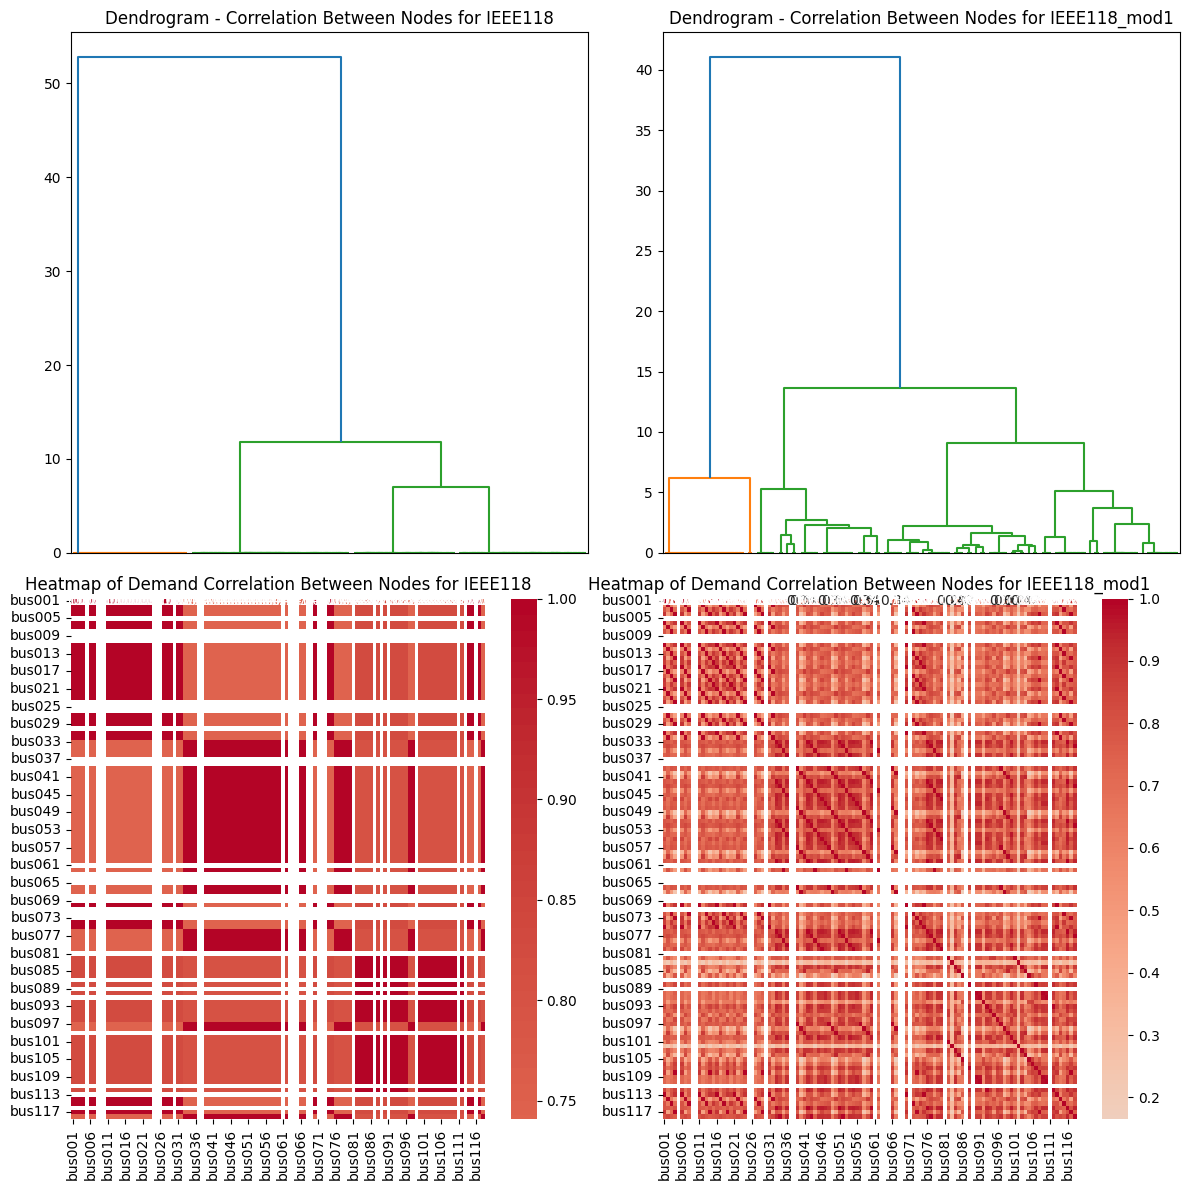

In [258]:
# Plotting the heatmap of the correlation matrix of corr1 and corr2
filled_correlation_matrix1 = corr1.fillna(0)
filled_correlation_matrix2 = corr2.fillna(0)

Z_filled1 = linkage(filled_correlation_matrix1, 'ward')
Z_filled2 = linkage(filled_correlation_matrix2, 'ward')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot dendrogram for corr1
dendrogram_corr1 = hierarchy.dendrogram(Z_filled1, ax=axs[0, 0])
axs[0, 0].set_title('Dendrogram - Correlation Between Nodes for ' + Case1)

# Plot dendrogram for corr2
dendrogram_corr2 = hierarchy.dendrogram(Z_filled2, ax=axs[0, 1])
axs[0, 1].set_title('Dendrogram - Correlation Between Nodes for ' + Case2)

# Remove x-axis ticks and labels for dendrogram plots
axs[0, 0].set_xticks([])
axs[0, 0].set_xticklabels([])
axs[0, 1].set_xticks([])
axs[0, 1].set_xticklabels([])

# Plot heatmap for corr1
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Demand Correlation Between Nodes for ' + Case1)

# Plot heatmap for corr2
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 1])
axs[1, 1].set_title('Heatmap of Demand Correlation Between Nodes for ' + Case2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [259]:
# average correlation matrix in corr1 and corr2
corr1_avg = corr1.mean()
corr2_avg = corr2.mean()
print(f'Average correlation for {Case1} is {corr1_avg.mean()}')
print(f'Average correlation for {Case2} is {corr2_avg.mean()}')

# Other statistics
corr1_std = corr1.std()
corr2_std = corr2.std()
print(f'Standard deviation of correlation for {Case1} is {corr1_std.mean()}')
print(f'Standard deviation of correlation for {Case2} is {corr2_std.mean()}')


Average correlation for IEEE118 is 0.8578583937056519
Average correlation for IEEE118_mod1 is 0.7162963333204816
Standard deviation of correlation for IEEE118 is 0.10633149614105983
Standard deviation of correlation for IEEE118_mod1 is 0.15126590862383654


In [260]:
# read CSV files related to VariableMaxGeneration
VariableMaxGeneration1 = pd.read_csv(os.path.join(DirName, Case1, '2.Par', f'oT_Data_VariableMaxGeneration_{Case1}.csv'), index_col=[0,1,2])
VariableMaxGeneration2 = pd.read_csv(os.path.join(DirName, Case2, '2.Par', f'oT_Data_VariableMaxGeneration_{Case2}.csv'), index_col=[0,1,2])

In [261]:
wind_dict = []
for i in VariableMaxGeneration1.columns:
    if 'Wind' in i:
        wind_dict.append(i)
print(wind_dict)
solar_dict = []
for i in VariableMaxGeneration1.columns:
    if 'Solar' in i:
        solar_dict.append(i)
print(solar_dict)

['Wind 01', 'Wind 02', 'Wind 03', 'Wind 04', 'Wind 05', 'Wind 06', 'Wind 07', 'Wind 08', 'Wind 09', 'Wind 10', 'Wind 11', 'Wind 12', 'Wind 13', 'Wind 14', 'Wind 15', 'Wind 16', 'Wind 17', 'Wind N01', 'Wind N02', 'Wind N03']
['Solar 01', 'Solar 02', 'Solar 03', 'Solar 04', 'Solar 05', 'Solar 06', 'Solar 07', 'Solar 08', 'Solar 09', 'Solar 10', 'Solar 11', 'Solar 12', 'Solar 13', 'Solar 14', 'Solar 15', 'Solar 16', 'Solar 17', 'Solar 18', 'Solar 19', 'Solar 20', 'Solar 21', 'Solar 22', 'Solar 23', 'Solar 24', 'Solar 25', 'Solar 26', 'Solar 27', 'Solar 28', 'Solar 29', 'Solar 30', 'Solar 31', 'Solar 32', 'Solar 33', 'Solar 34', 'Solar 35', 'Solar 36', 'Solar 37', 'Solar 38', 'Solar 39', 'Solar 40', 'Solar 41', 'Solar 42', 'Solar 43', 'Solar 44', 'Solar 45', 'Solar 46', 'Solar 47', 'Solar 48', 'Solar 49', 'Solar 50', 'Solar 51', 'Solar 52', 'Solar 53', 'Solar 54', 'Solar 55', 'Solar 56', 'Solar 57', 'Solar 58', 'Solar 59', 'Solar 60', 'Solar 61', 'Solar 62', 'Solar 63', 'Solar 64', 'Solar 

In [262]:
# drop columns that are not in wind_dict
wind1 = VariableMaxGeneration1[wind_dict]
wind2 = VariableMaxGeneration2[wind_dict]

In [263]:
# drop columns that are not in solar_dict
solar1 = VariableMaxGeneration1[solar_dict]
solar2 = VariableMaxGeneration2[solar_dict]

In [264]:
wind1_corr = wind1.corr()
wind2_corr = wind2.corr()
solar1_corr = solar1.corr()
solar2_corr = solar2.corr()

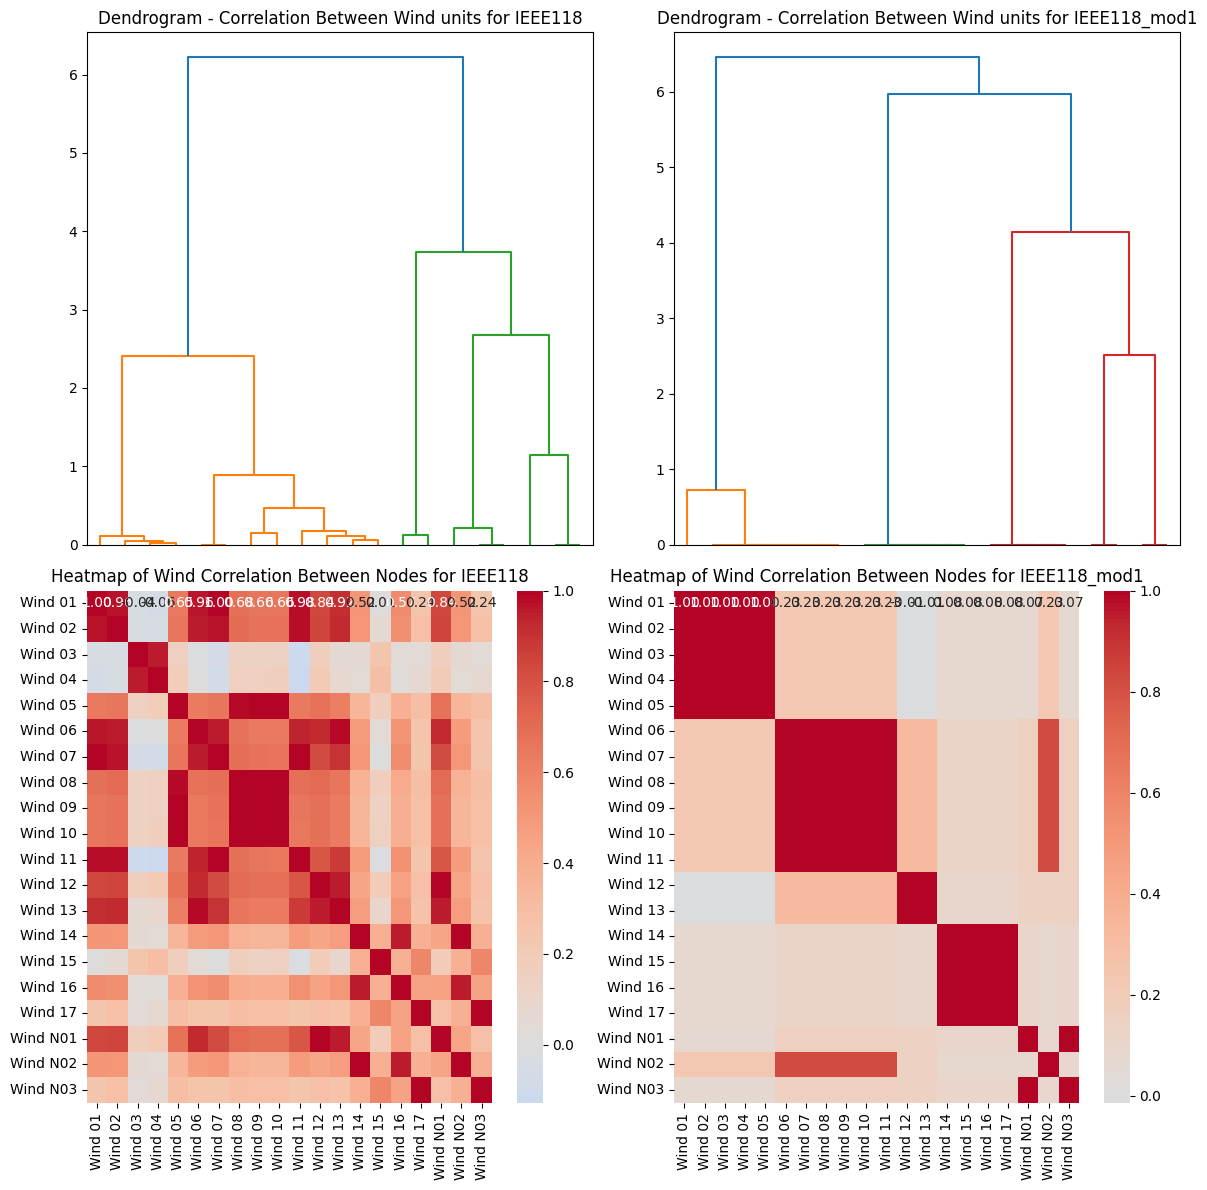

In [265]:
# Plotting the heatmap of the correlation matrix of corr1 and corr2
filled_correlation_matrix1 = wind1_corr.fillna(0)
filled_correlation_matrix2 = wind2_corr.fillna(0)

Z_filled1 = linkage(filled_correlation_matrix1, 'ward')
Z_filled2 = linkage(filled_correlation_matrix2, 'ward')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot dendrogram for corr1
dendrogram_corr1 = hierarchy.dendrogram(Z_filled1, ax=axs[0, 0])
axs[0, 0].set_title('Dendrogram - Correlation Between Wind units for ' + Case1)

# Plot dendrogram for corr2
dendrogram_corr2 = hierarchy.dendrogram(Z_filled2, ax=axs[0, 1])
axs[0, 1].set_title('Dendrogram - Correlation Between Wind units for ' + Case2)

# Remove x-axis ticks and labels for dendrogram plots
axs[0, 0].set_xticks([])
axs[0, 0].set_xticklabels([])
axs[0, 1].set_xticks([])
axs[0, 1].set_xticklabels([])

# Plot heatmap for corr1
sns.heatmap(wind1_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Wind Correlation Between Nodes for ' + Case1)

# Plot heatmap for corr2
sns.heatmap(wind2_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 1])
axs[1, 1].set_title('Heatmap of Wind Correlation Between Nodes for ' + Case2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


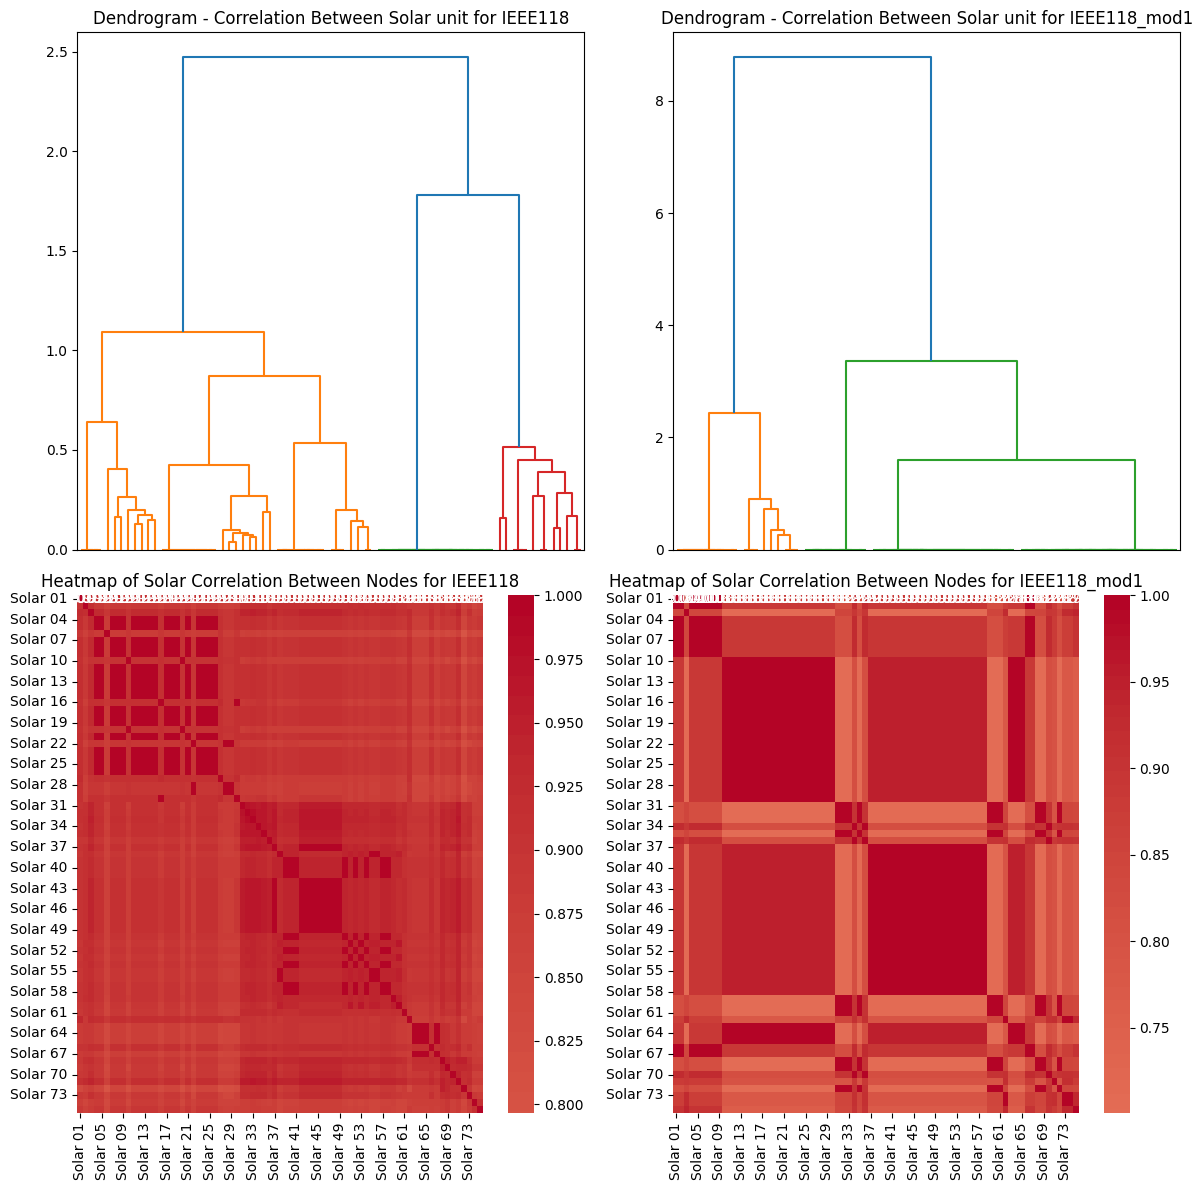

In [266]:
# Plotting the heatmap of the correlation matrix of corr1 and corr2
filled_correlation_matrix1 = solar1_corr.fillna(0)
filled_correlation_matrix2 = solar2_corr.fillna(0)

Z_filled1 = linkage(filled_correlation_matrix1, 'ward')
Z_filled2 = linkage(filled_correlation_matrix2, 'ward')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot dendrogram for corr1
dendrogram_corr1 = hierarchy.dendrogram(Z_filled1, ax=axs[0, 0])
axs[0, 0].set_title('Dendrogram - Correlation Between Solar unit for ' + Case1)

# Plot dendrogram for corr2
dendrogram_corr2 = hierarchy.dendrogram(Z_filled2, ax=axs[0, 1])
axs[0, 1].set_title('Dendrogram - Correlation Between Solar unit for ' + Case2)

# Remove x-axis ticks and labels for dendrogram plots
axs[0, 0].set_xticks([])
axs[0, 0].set_xticklabels([])
axs[0, 1].set_xticks([])
axs[0, 1].set_xticklabels([])

# Plot heatmap for corr1
sns.heatmap(solar1_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Solar Correlation Between Nodes for ' + Case1)

# Plot heatmap for corr2
sns.heatmap(solar2_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0, ax=axs[1, 1])
axs[1, 1].set_title('Heatmap of Solar Correlation Between Nodes for ' + Case2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [267]:
# read the CostSummary from Folder 3.Out and compare the cost of the two cases
CostSummary1 = pd.read_csv(os.path.join(DirName, Case1, '3.Out', f'oT_Result_CostSummary_{Case1}.csv'))
CostSummary2 = pd.read_csv(os.path.join(DirName, Case2, '3.Out', f'oT_Result_CostSummary_{Case2}.csv'))

In [268]:
# drop the first row
CostSummary1 = CostSummary1.drop(0)
CostSummary2 = CostSummary2.drop(0)

In [269]:
CostSummary1['Case'] = Case1
CostSummary2['Case'] = Case2

In [270]:
# drop rows 'Generation Investment Cost' and 'Consumption Operating Cost'
CostSummary1 = CostSummary1[CostSummary1['Cost/Payment'] != 'Generation Investment Cost']
CostSummary1 = CostSummary1[CostSummary1['Cost/Payment'] != 'Consumption Operation Cost']
CostSummary2 = CostSummary2[CostSummary2['Cost/Payment'] != 'Generation Investment Cost']
CostSummary2 = CostSummary2[CostSummary2['Cost/Payment'] != 'Consumption Operation Cost']

In [271]:
# concatenate the two dataframes
CostSummary = pd.concat([CostSummary1, CostSummary2])

In [272]:
Chart = alt.Chart(CostSummary).mark_bar().encode(
    x='Case',
    y='MEUR',
    color=alt.Color('Case', legend=alt.Legend(title="Case", labelFontSize=14, titleFontSize=16)),
    column=alt.Column('Cost/Payment', title='Cost/Payment', header=alt.Header(labelFontSize=14, titleFontSize=16))
).properties(
    width=200,
    height=400
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    labelFontSize=14,
    titleFontSize=16
)

Chart

alt.Chart(...)

In [273]:
# read the NetworkInvestment file from Folder 3.Out and compare the two cases
NetworkInvestment1 = pd.read_csv(os.path.join(DirName, Case1, '3.Out', f'oT_Result_NetworkInvestment_{Case1}.csv'))
NetworkInvestment2 = pd.read_csv(os.path.join(DirName, Case2, '3.Out', f'oT_Result_NetworkInvestment_{Case2}.csv'))

In [274]:
NetworkInvestment1['Case'] = Case1
NetworkInvestment2['Case'] = Case2

In [275]:
# concatenate the two dataframes
NetworkInvestment = pd.concat([NetworkInvestment1, NetworkInvestment2])

In [276]:
# rename column name 'p.u.' to 'pu'
NetworkInvestment = NetworkInvestment.rename(columns={'p.u.': 'pu'})

In [277]:
# drop 0 in pu column
NetworkInvestment = NetworkInvestment[NetworkInvestment['pu'] != 0]

In [280]:
NetworkInvestment['Branch'] = NetworkInvestment['InitialNode'] + '-' + NetworkInvestment['FinalNode']

In [292]:
Chart = alt.Chart(NetworkInvestment).mark_bar().encode(
    x='Case',
    y='pu',
    color=alt.Color('Circuit', legend=alt.Legend(title="Circuit", labelFontSize=14, titleFontSize=16)),
    column=alt.Column('Branch', title='Branch', header=alt.Header(labelFontSize=14, titleFontSize=16, labelAngle=-90))
).properties(
    width=25,
    height=200
).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    labelFontSize=14,
    titleFontSize=16
)

Chart

alt.Chart(...)